# Notebook for debugging

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.3
pandas==2.2.0


In [2]:
from pykitPIV import Particle, Image, FlowField, Motion

In [25]:
image_size = (220,500)

***

## Define particles

In [26]:
particles = Particle(1, 
                     size=image_size, 
                     size_buffer=20,
                     diameters=(6,10),
                     distances=(1,2),
                     densities=(0.01,0.02),
                     signal_to_noise=(5,20),
                     diameter_std=1,
                     seeding_mode='random', 
                     random_seed=100)

In [27]:
image = Image(random_seed=100)

In [28]:
image.add_particles(particles)

Particles added to the image.


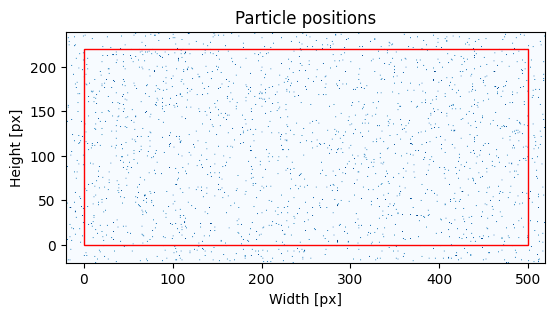

In [29]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Blues',
           figsize=(10,3), 
           filename='particle-positions.png');

In [30]:
image.add_reflected_light(exposures=(0.02,0.8),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.7,
                          alpha=1/20)

Reflected light added to the image.


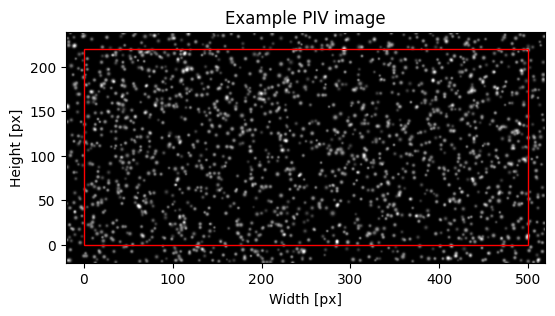

In [31]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=(10,3), 
           filename='example-image.png');

***

## Generate random velocity field to advect the particles

In [35]:
flowfield = FlowField(1,
                      size=image_size,
                      size_buffer=20,
                      flow_mode='random',
                      gaussian_filters=(8,10),
                      n_gaussian_filter_iter=10,
                      sin_period=(30,300),
                      displacement=(0,10),
                      random_seed=100)

In [36]:
image.add_velocity_field(flowfield)

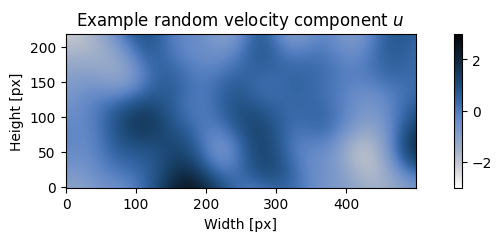

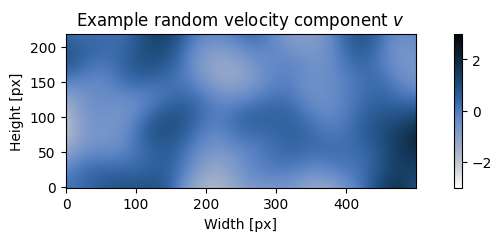

In [38]:
image.plot_velocity_field(0,
                          with_buffer=False,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          vmin_vmax=(-3,3),
                          figsize=(10,2),
                          filename='example-random-velocity-field.png');

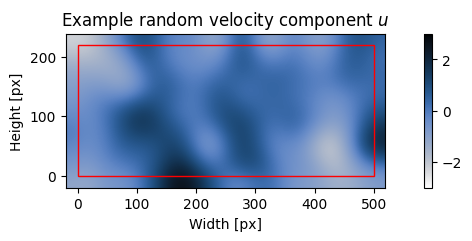

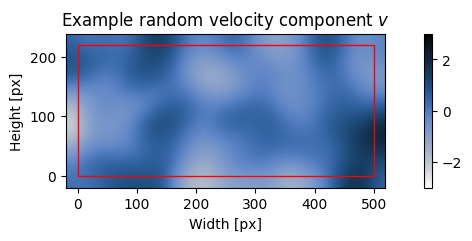

In [39]:
image.plot_velocity_field(0,
                          with_buffer=True,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          vmin_vmax=(-3,3),
                          figsize=(10,2),
                          filename='example-random-velocity-field.png');

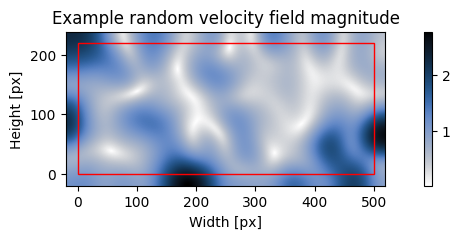

In [40]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=True,
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=(10,2),
                                    filename='example-random-velocity-field-magnitude.png');

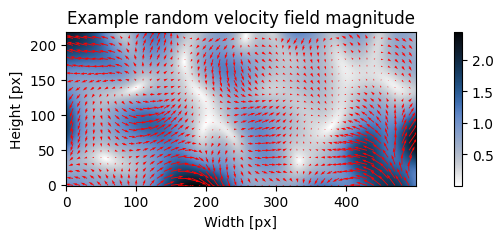

In [44]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_quiver=True,
                                    quiver_step=10,
                                    quiver_color='r',
                                    # add_streamplot=True,
                                    # streamplot_density=1,
                                    # streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=(10,2),
                                    filename='example-random-velocity-field-magnitude.png');

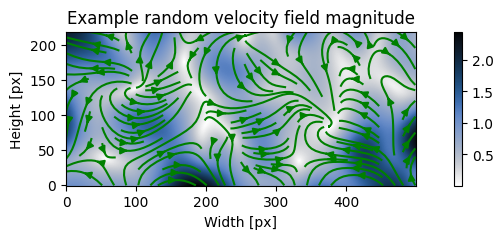

In [45]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    # add_quiver=True,
                                    # quiver_step=10,
                                    # quiver_color='r',
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=(10,2),
                                    filename='example-random-velocity-field-magnitude.png');

***

## Add movement to particles

In [46]:
motion = Motion(particles, flowfield)

***